Example script to extract a time serie of the ETFVC EPS product over a domain
To run in **google colab**

In [ ]:
## Clone the repository to local env. to access the module thredds_lsasaf_utils.py  
!rm -rf /content/lsasaf_data_access/
!git clone https://gitlab.com/helpdesk.landsaf/lsasaf_data_access.git
import sys
sys.path.insert(0,'/content/lsasaf_data_access/examples/thredds/')
## Required to load netcdf files using OpenDAP (valid in May 2023)
!pip install "netcdf4<1.6"

In [2]:
import datetime as dt 
import thredds_lsasaf_utils as tlu

In [3]:
# Change here your user credentials
server_user="XXX"
server_passwd="XXX"

# Change here the product details 
# Go to https://thredds.lsasvcs.ipma.pt/thredds/catalog/catalog.html
# Navigate selecting satelite, product, format, and data to find the product_path and product file name 
# This is an example for the MSG MTFVC product 
product_path="/EPS/ETFVC/NETCDF/"
product_fname="NETCDF4_LSASAF_M01-AVHR_ETFVC_GLOBE"
NcvarsLoad=['FVC'] # list of netcdf variables to load from remote files 
# time period to process 
dstart=dt.datetime(2015,1,1) #start slot 
dend=dt.datetime(2023,12,1)   # end slot 
product_freq="day15" # special case to load only day 15 of each month for monthly means 

## Define latitude/longitude domain to load [on_min,lon_max,lat_min,lat_max]
LatLonBox = [-10,3,36,44] # example for Iberian Peninsula 

In [4]:
# Initialize product details

product = tlu.lsa_product(product_path,product_fname)
product.user = server_user
product.passwd = server_passwd


# list of slots to be processed:
slot_list = tlu.gen_slot_list(dstart,dend,product_freq)
print(f"Will load:{len(slot_list)} files: {slot_list[0]} to {slot_list[-1]}")

# Load data 
ds_full = tlu.load_product_slots_domain(product,slot_list,NcvarsLoad,LatLonBox)


Will load:107 files: 2015-01-15 00:00:00 to 2023-11-15 00:00:00


Processing 2023-05-15 00:00:00: 100%|██████████| 107/107 [03:30<00:00,  1.97s/it]


Loaded 97 out of 107 slots with dims: Frozen({'time': 97, 'lat': 801, 'lon': 1301}) in 210.73 seconds 


<xarray.Dataset>
Dimensions:  (time: 97, lat: 801, lon: 1301)
Coordinates:
  * lat      (lat) float32 36.0 36.01 36.02 36.03 ... 43.97 43.98 43.99 44.0
  * lon      (lon) float32 -10.0 -9.99 -9.98 -9.97 -9.96 ... 2.97 2.98 2.99 3.0
  * time     (time) datetime64[ns] 2015-02-15 2015-03-15 ... 2023-05-15
Data variables:
    FVC      (time, lat, lon) float32 nan nan nan nan ... 0.7158 0.744 0.7387
Attributes: (12/29)
    references:                      Data provided by the EUMETSAT Satellite ...
    easternmost_longitude:           -180.0
    westernmost_longitude:           179.989990234375
    spatial_resolution:               0.01x 0.01
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_resolution:        0.01
    geospatial_lon_resolution:        0.01
    northernmost_latitude:           90.0
    southernmost_latitude:           -90.0
    DODS.strlen:                     0
    DODS_EXTRA.Unlimited_Dimension:  time

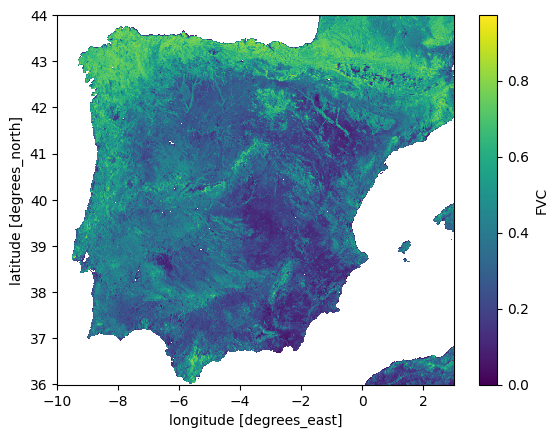

In [5]:
## plot map with temporal mean 
ds_full.mean(dim='time')[NcvarsLoad[0]].plot.imshow()

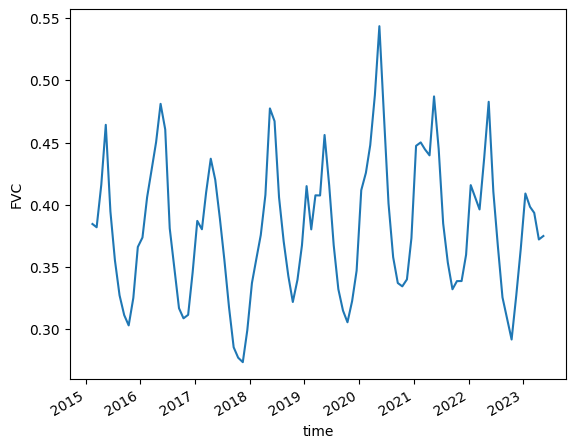

In [6]:
## plot temporal evolution, mean over the region
ds_full.mean(dim=['lat','lon'])[NcvarsLoad[0]].plot()

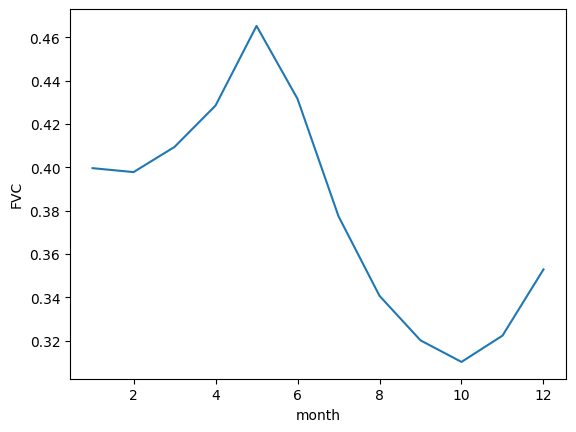

In [7]:
## plot mean annual cycle over the region 
ds_full.mean(dim=['lat','lon'])[NcvarsLoad[0]].groupby('time.month').mean('time').plot()